In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [2]:
abspath = os.getcwd()
abspath = abspath.split("abag-benchmark-set")[0] + "abag-benchmark-set"

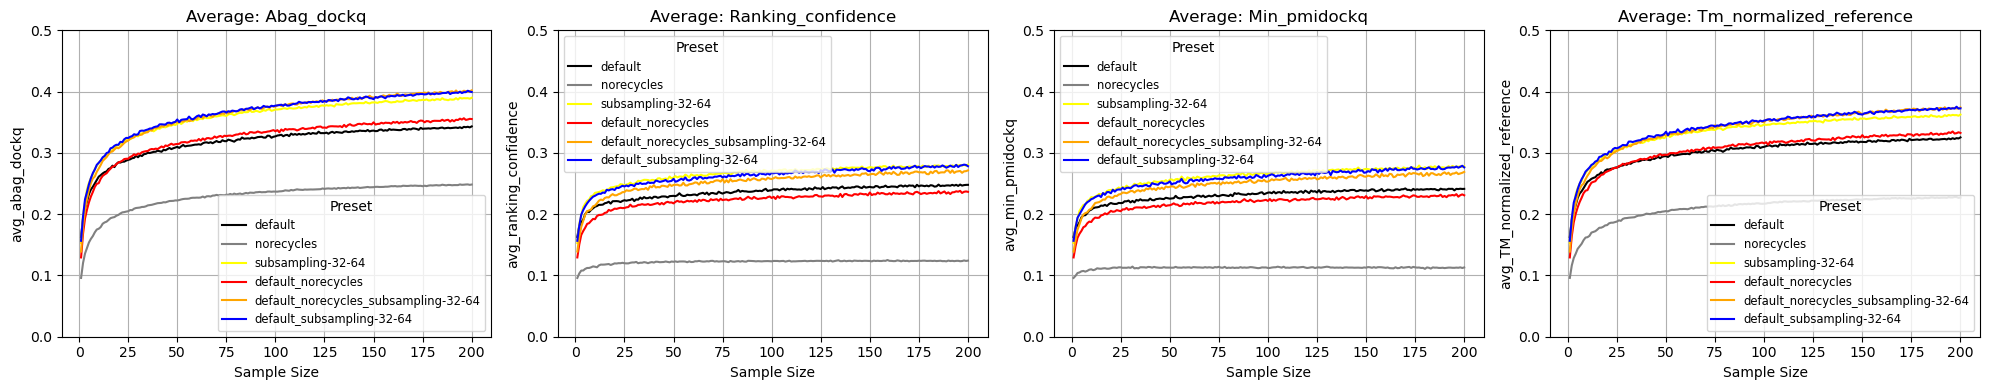

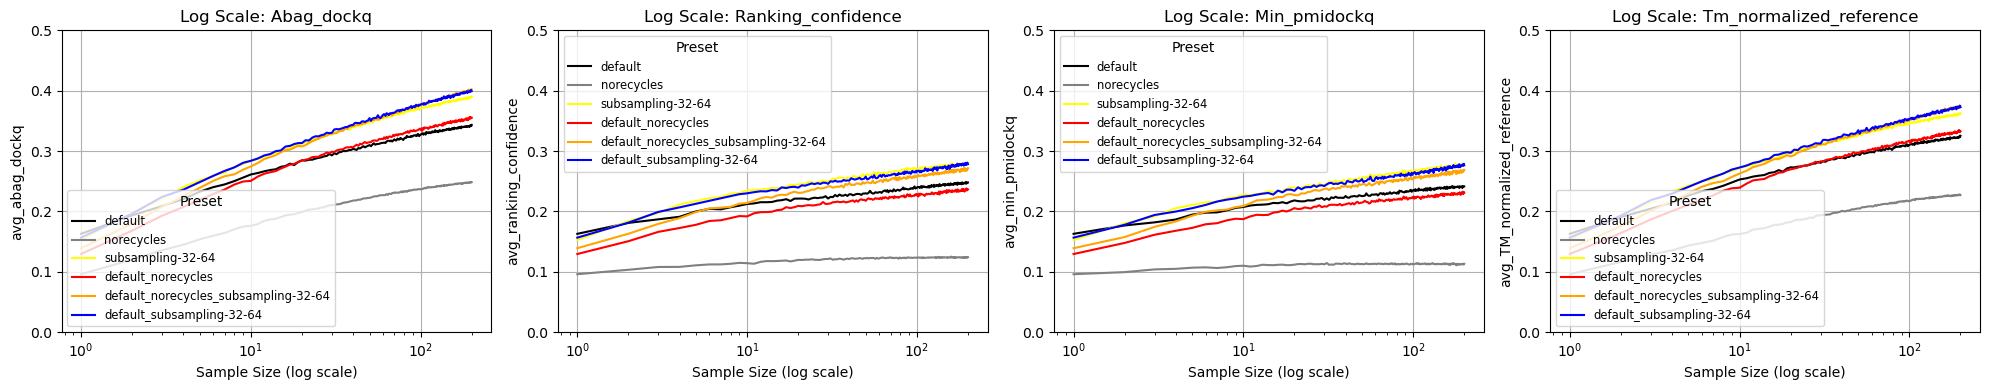

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

presets = ['default', 'norecycles', 'subsampling-32-64', 'default_norecycles', 'default_norecycles_subsampling-32-64', 'default_subsampling-32-64']
color_palette = ['black', 'gray', 'yellow', 'red', 'orange','blue'] 

score_paths = {preset: os.path.join(abspath, f"results/sampling_scores/sampling_scores_{preset}.csv") for preset in presets}

# Combine all dataframes
data = pd.DataFrame()  # Initialize an empty dataframe

for preset, path in score_paths.items():
    if os.path.exists(path):  # Ensure the file exists
        df = pd.read_csv(path)  # Read the CSV file
        df['preset'] = preset  # Add the preset column for identification
        data = pd.concat([data, df], ignore_index=True)  # Concatenate into the combined dataframe
    else:
        print(f"File not found: {path}")

# Extract columns for plotting
columns_to_plot = [col for col in data.columns if col.startswith("avg_")]
presets = data["preset"].unique()

# Compute the average over all PDBs for each combination of 'preset' and 'sample_size'
avg_df = data.groupby(["preset", "sample_size"])[columns_to_plot].mean().reset_index()


# Plot with linear scale
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(5 * len(columns_to_plot), 4))
axes = axes if len(columns_to_plot) > 1 else [axes]  # Ensure axes is a list for consistency

for col_idx, column in enumerate(columns_to_plot):
    ax = axes[col_idx]
    for preset_idx, preset in enumerate(presets):
        preset_subset = avg_df[avg_df["preset"] == preset]
        ax.plot(preset_subset["sample_size"], preset_subset[column], label=preset, color=color_palette[preset_idx % len(color_palette)])
    ax.set_title(f"Average: {column.replace('avg_', '').capitalize()}")
    ax.set_xlabel("Sample Size")
    ax.set_ylabel(column)
    ax.set_ylim(0., 0.5)
    ax.legend(title="Preset", fontsize='small', loc='best')
    ax.grid(True)

plt.tight_layout()
plt.show()

# Plot with log scale
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(5 * len(columns_to_plot), 4))
axes = axes if len(columns_to_plot) > 1 else [axes]  # Ensure axes is a list for consistency

for col_idx, column in enumerate(columns_to_plot):
    ax = axes[col_idx]
    for preset_idx, preset in enumerate(presets):
        preset_subset = avg_df[avg_df["preset"] == preset]
        ax.plot(preset_subset["sample_size"], preset_subset[column], label=preset, color=color_palette[preset_idx % len(color_palette)])
    ax.set_title(f"Log Scale: {column.replace('avg_', '').capitalize()}")
    ax.set_xlabel("Sample Size (log scale)")
    ax.set_ylabel(column)
    ax.set_ylim(0., 0.5)
    ax.set_xscale("log")  # Set x-axis to log scale
    ax.legend(title="Preset", fontsize='small', loc='best')
    ax.grid(True)

plt.tight_layout()
plt.show()

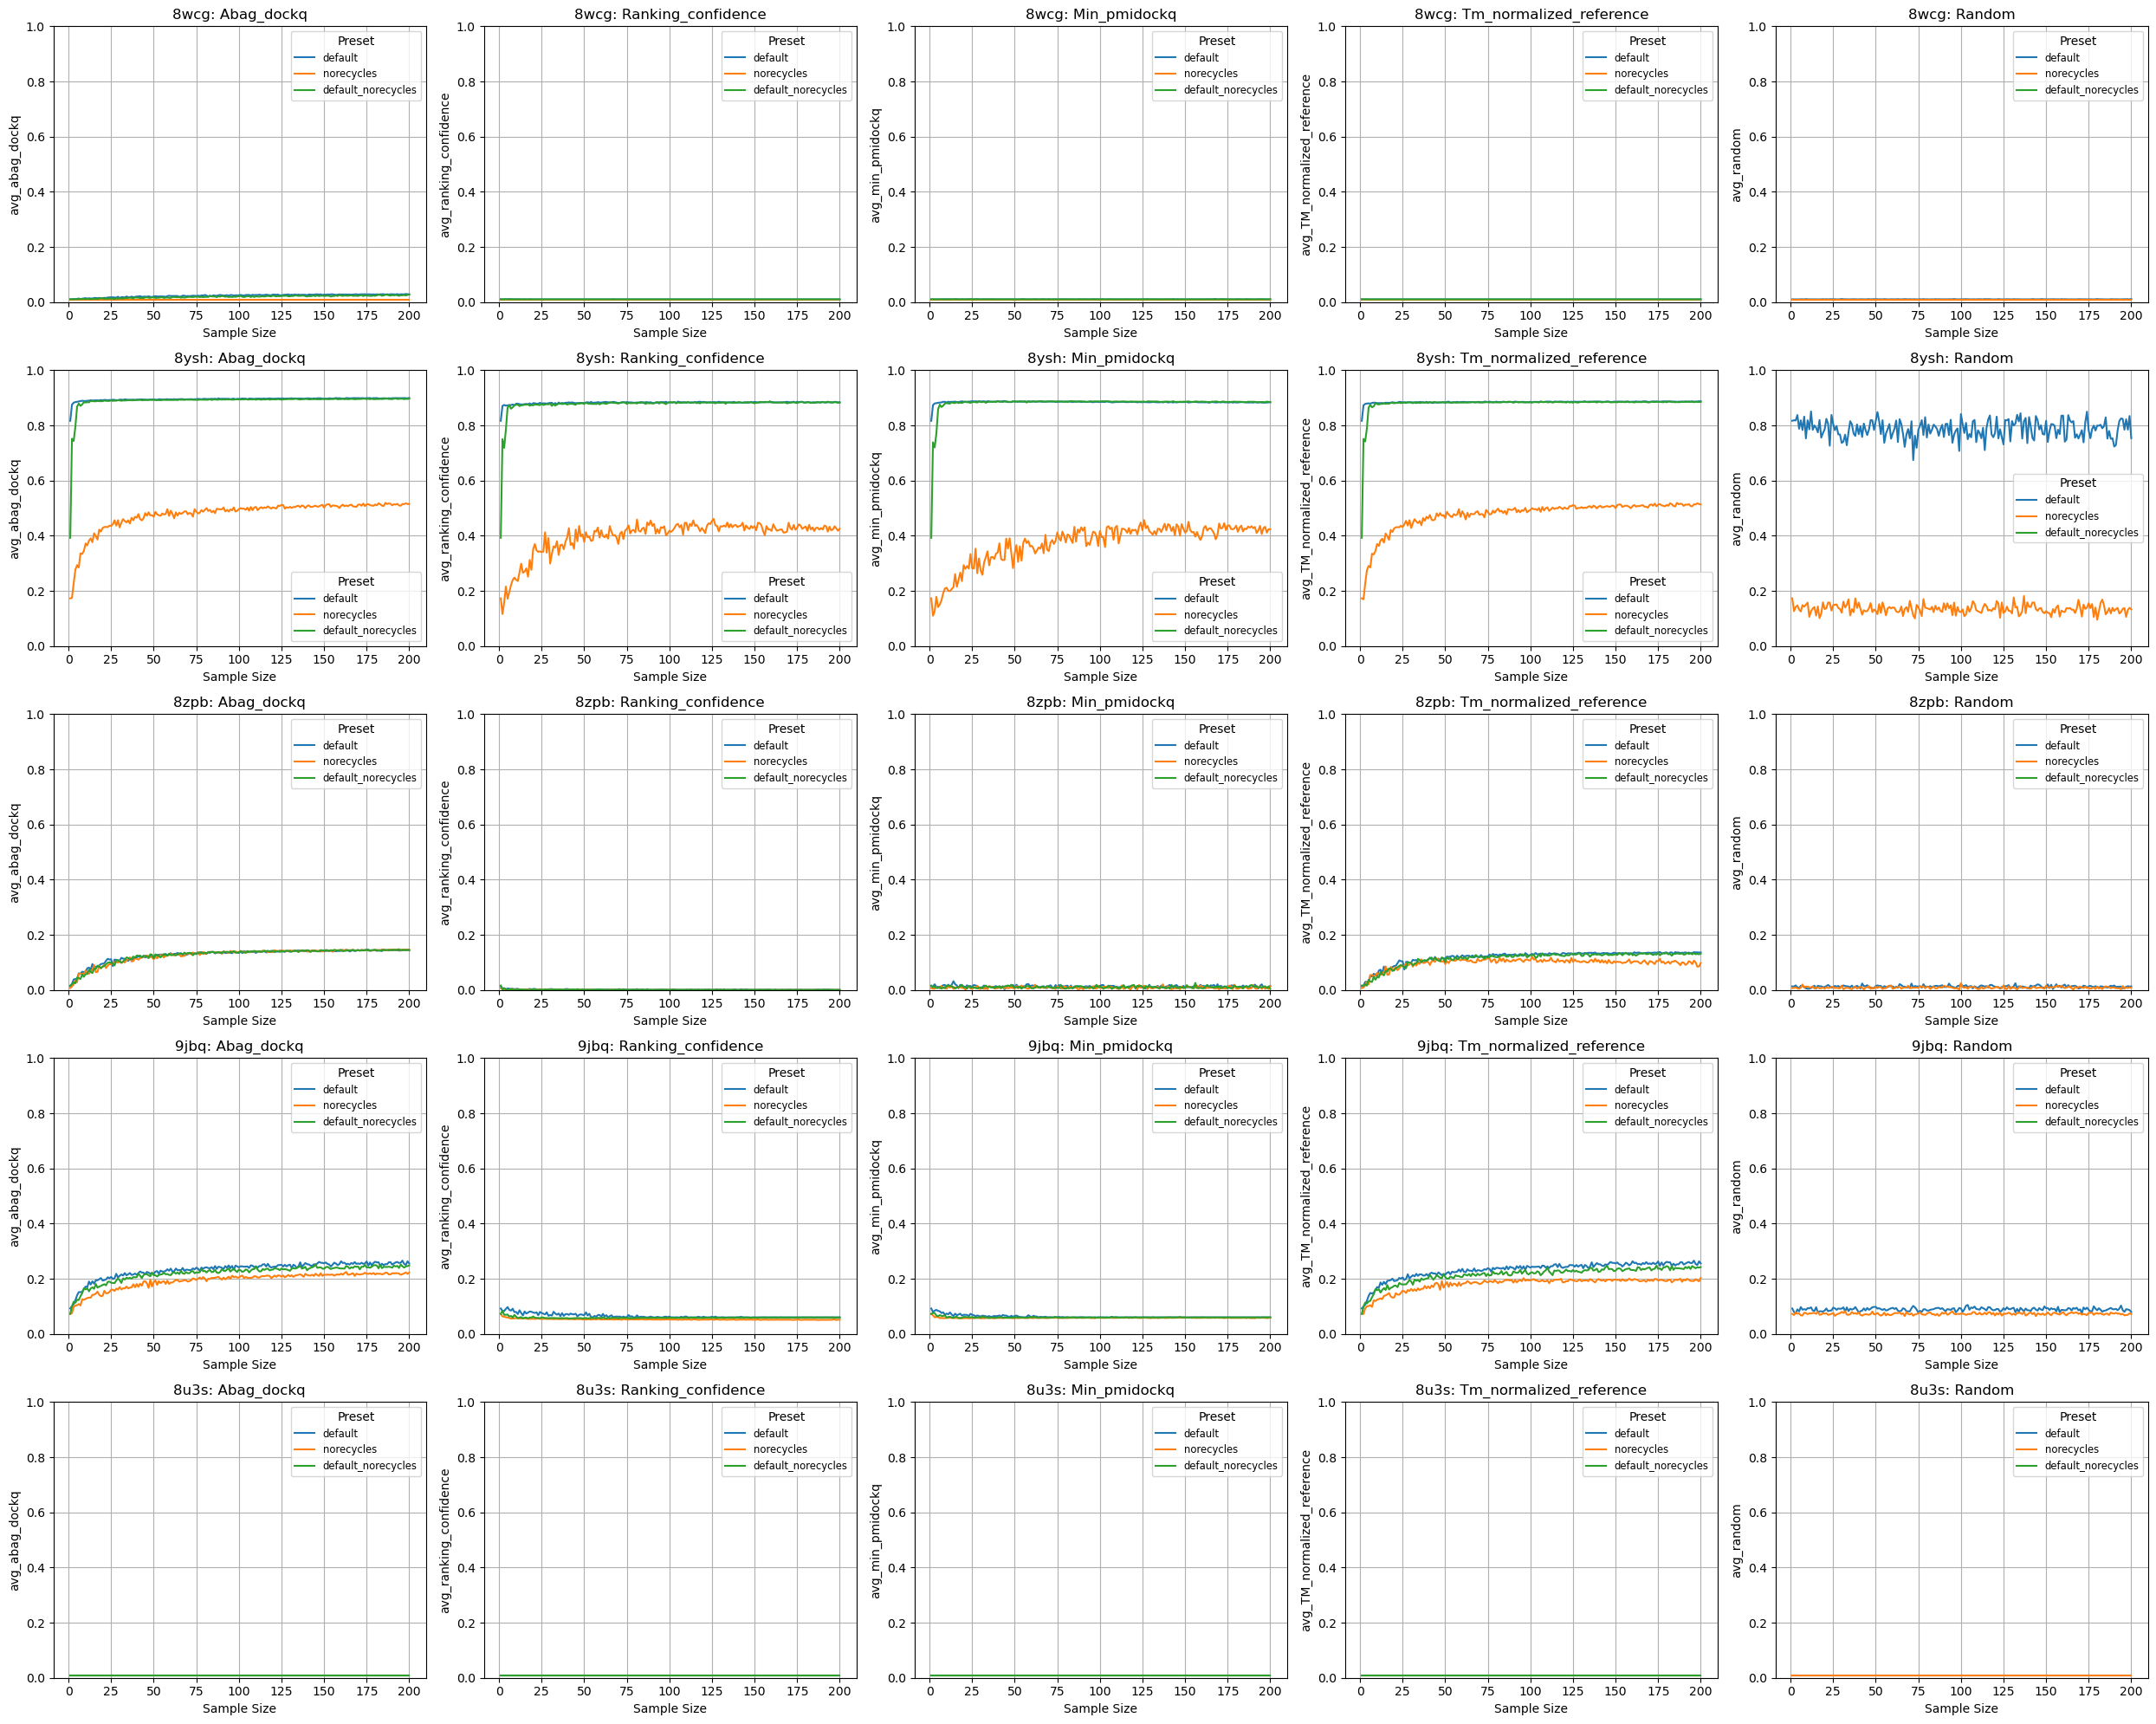

In [4]:
df = data

# Extract columns for plotting
columns_to_plot = [col for col in df.columns if col.startswith("avg_")]
pdbids = df["pdbid"].unique()
presets = df["preset"].unique()

pdbids = pdbids[:5]

# Automatically adjust figure size
fig, axes = plt.subplots(len(pdbids), len(columns_to_plot), 
                         figsize=(5 * len(columns_to_plot), 4 * len(pdbids)))

# Ensure axes is always a 2D array for consistency
axes = axes if len(pdbids) > 1 else [axes]

# Iterate over pdbids and columns to create plots
for row_idx, pdbid in enumerate(pdbids):
    for col_idx, column in enumerate(columns_to_plot):
        ax = axes[row_idx][col_idx] if len(columns_to_plot) > 1 else axes[row_idx]
        subset = df[df["pdbid"] == pdbid]
        
        for preset in presets:
            preset_subset = subset[subset["preset"] == preset]
            ax.plot(preset_subset["sample_size"], preset_subset[column], label=preset)
        
        ax.set_title(f"{pdbid}: {column.replace('avg_', '').capitalize()}")
        ax.set_xlabel("Sample Size")
        ax.set_ylabel(column)
        ax.set_ylim(0, 1)
        ax.legend(title="Preset", fontsize='small', loc='best')
        ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()